## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



## Regression
***

Taking a look at the data as plotted on a scatterplot (below), my inclination would be to apply regression as a model. Given that the dataset contains only two variables, simple linear regression may be an option.  

<br>



Firstly, I import the necessary Python packages. `Numpy` to perform numeric calculations, `Pandas` for data manipulation and analysis, `Matplotlib.pyplot` for visualisation and `sklearn.model_selection` to train my model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr


In [2]:
# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [14, 8]

<br>

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to the variable `pp` and output the first and final five rows to give a quick overview of the data.

In [3]:
pp = pd.read_csv('powerproduction.csv')
pp

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<br>

The `describe()` function outputs a summary of the data giving us a more nuanced overview.

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



Visualisation of the data gives us a useful preliminary indication as to what model to choose and train in order to predict values for the dependent variable. Below, I plot the data on a scatterplot. 



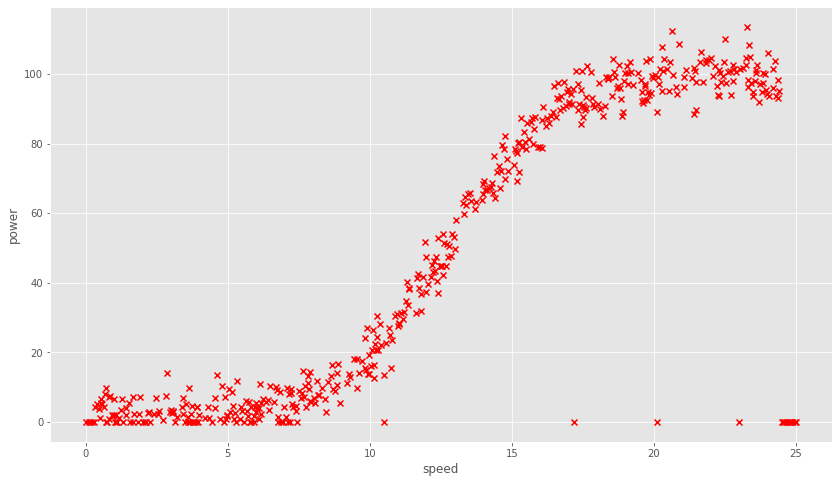

In [5]:
# Plot data on a scatter plot
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp['speed'], pp['power'], color='r', marker='x')

<br>



### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [1]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [2]. With these two considerations in mind, regression appears to be an appropriate approach to take. Firstly, the aim of the current project is to predict wind turbine power output (*dependent variable*) based on speed values (*independent variable*). Second, taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.

[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[2] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>

I use a simple linear regression function imported from Python's Scikit-learn library to produce a model. Simple linear regression can be applied when the data set contains only two variables - a dependent and independent variable. This is a condition which is filled by the 'powerproduction' data set.

<br>

First, the data set is split into two separate columns in order to train the model.

In [6]:
# Create a new dataset containing only values from the speed column and print output
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [7]:
# Create a new dataset containing only values from the power column and print output 
power_df = pp.drop('speed',axis='columns')
power_df

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


<br>

Next, I create an instance of the LinearRegression() class and call the `fit` method, passing the speed and power dataframes as arguments. 

In [8]:
# Create an instance of the LinearRegression() class
reg = LinearRegression()

# Fit our data to the model
reg.fit(speed_df, power_df)

LinearRegression()

Once this is done, we can now test the model for accuracy. We can do this by calling a number of methods provided by the functionality of the `LinearRegresssion()` class.

<br>

First, I take a pick a value for speed and pass it to the `.predict` method

In [9]:
# Predict method using a value for speed
email = 10.89
arr = reg.predict([[9.746]])

<br>

Next, I call the `intercept_` method to determine where the line intercepts the y-axis. And below that I use call `coef_` to get the slope of the line. This gives us all the values for formula for the best-fitting line: $$y = mx + b$$ where m is the slope, b is the y-interept and x is the independent variable [3].

[3] dummies.com; How to calculate a regression line; https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/ <br>

In [10]:
# Call the intercept_ method to determine where the line intercepts the y-axis
reg.intercept_

array([-13.89990263])

In [11]:
# Call the coef_ method to calculate the slope of the line
reg.coef_

array([[4.91759567]])

In [12]:
# Set calculated values
m = 4.91759567
x = 9.746
b = -13.899902630519641

y = m*x + b
print(y)

34.02698476930036


As expected, we get the same result for y when we input these values into the formula (above)
<br>



### R-squared 

The `LinearRegression` class also provides functionality for calculating the the R-squared value. The R-squared value is a 'goodness-of-fit' measure which can give us an indication as to the accuracy of our regression model. The best possible score is 1.0, while a score of 0 or a negative value generally represents a worse-fitting line. The R-squared value "indicates the percentage of the variance in the dependent variable that the independent variables explain collectively." [4] It is worth noting that a high R-squared does not necessarily always indicate the best fit [5].

[4] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[5] *Ibid*

In [13]:
# Calculate R-squared value
reg.score(speed_df, power_df)

0.7289360258564072

<br>


***

### Train_test_split

The train-test-split procedure involves training a machine learning algorithm by splitting the data into separate proportions. One proportion (train) is used to train the model while the other (test) is held back in order to test its accuracy. (It is worth pointing out that it may not always be appropriate as a technique to increase accuracy of prediction e.g. if the data set is too small [6].) 

<br>

Below, I pass the speed_df and power_df dataframes to the `train_test_split` method and set the parameter *test_size* to 0.2. The test size indicates the size of the train and test sets. Common split percentages include 
* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50% [7]


[6] machinelearningmastery.com; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[7] *Ibid*

In [14]:
# Call train_test_split method on dataframes
A_Train, A_Test, B_Train, B_Test = train_test_split(speed_df, power_df, test_size = 0.2)

In [15]:
x = pp['speed']
y = pp['power']

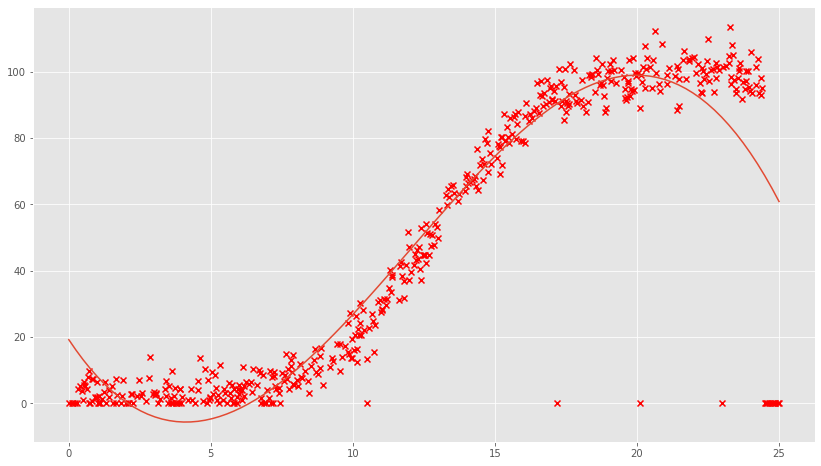

In [16]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()


## Neural network - Regression

***

In [17]:
pp = pp[pp.power != 0]
pp.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [38]:
# Create neural network with one neuron
def create_model():
    model = kr.models.Sequential()
    model.add(kr.Input(shape=(1,)))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
    
    return model

In [39]:
model = create_model()

In [40]:


msk = np.random.rand(len(pp)) < 0.5
train = pp[msk]

test = pp[~msk]

In [41]:
model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 3979.2986
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 2597.0840
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 1139.8444
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 335.7815
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 290.7549
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 298.0786
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 296.5848
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 267.4634
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 261.7704
Epoch 10/500
25/25 [==============================] - 0s 4ms/step - loss: 268.3396
Epoch 11/500
25/25 [==============================] - 0s 4ms/step - loss: 262.7860
Epoch 12/500
25/25 [==============================] - 0s 5ms/step - loss: 229.9349
Epoch 13/5

25/25 [==============================] - 0s 2ms/step - loss: 63.9679
Epoch 101/500
25/25 [==============================] - 0s 2ms/step - loss: 50.3584
Epoch 102/500
25/25 [==============================] - 0s 3ms/step - loss: 51.0197
Epoch 103/500
25/25 [==============================] - 0s 3ms/step - loss: 50.3392
Epoch 104/500
25/25 [==============================] - 0s 3ms/step - loss: 52.8203
Epoch 105/500
25/25 [==============================] - 0s 3ms/step - loss: 64.4077
Epoch 106/500
25/25 [==============================] - 0s 3ms/step - loss: 49.4273
Epoch 107/500
25/25 [==============================] - 0s 3ms/step - loss: 63.1491
Epoch 108/500
25/25 [==============================] - 0s 3ms/step - loss: 60.6653
Epoch 109/500
25/25 [==============================] - 0s 3ms/step - loss: 58.3636
Epoch 110/500
25/25 [==============================] - 0s 3ms/step - loss: 47.0185
Epoch 111/500
25/25 [==============================] - 0s 3ms/step - loss: 55.9751
Epoch 112/500
25/2

25/25 [==============================] - 0s 3ms/step - loss: 29.2276
Epoch 199/500
25/25 [==============================] - 0s 3ms/step - loss: 27.2981
Epoch 200/500
25/25 [==============================] - 0s 3ms/step - loss: 24.4323
Epoch 201/500
25/25 [==============================] - 0s 3ms/step - loss: 30.9732
Epoch 202/500
25/25 [==============================] - 0s 5ms/step - loss: 24.2754
Epoch 203/500
25/25 [==============================] - 0s 5ms/step - loss: 27.1885
Epoch 204/500
25/25 [==============================] - 0s 3ms/step - loss: 26.6452
Epoch 205/500
25/25 [==============================] - 0s 4ms/step - loss: 26.7330
Epoch 206/500
25/25 [==============================] - 0s 4ms/step - loss: 24.5535
Epoch 207/500
25/25 [==============================] - 0s 4ms/step - loss: 26.9963
Epoch 208/500
25/25 [==============================] - 0s 5ms/step - loss: 28.6896
Epoch 209/500
25/25 [==============================] - 0s 4ms/step - loss: 23.3781
Epoch 210/500
25/2

25/25 [==============================] - 0s 4ms/step - loss: 20.9266
Epoch 297/500
25/25 [==============================] - 0s 4ms/step - loss: 19.6278
Epoch 298/500
25/25 [==============================] - 0s 4ms/step - loss: 20.3975
Epoch 299/500
25/25 [==============================] - 0s 3ms/step - loss: 19.7500
Epoch 300/500
25/25 [==============================] - 0s 4ms/step - loss: 21.1462
Epoch 301/500
25/25 [==============================] - 0s 4ms/step - loss: 21.3609
Epoch 302/500
25/25 [==============================] - 0s 3ms/step - loss: 19.8372
Epoch 303/500
25/25 [==============================] - 0s 4ms/step - loss: 20.4655
Epoch 304/500
25/25 [==============================] - 0s 4ms/step - loss: 25.0724
Epoch 305/500
25/25 [==============================] - 0s 4ms/step - loss: 22.3665
Epoch 306/500
25/25 [==============================] - 0s 4ms/step - loss: 18.7805
Epoch 307/500
25/25 [==============================] - 0s 4ms/step - loss: 19.0079
Epoch 308/500
25/2

25/25 [==============================] - 0s 3ms/step - loss: 14.0481
Epoch 395/500
25/25 [==============================] - 0s 3ms/step - loss: 18.1436
Epoch 396/500
25/25 [==============================] - 0s 4ms/step - loss: 21.8198
Epoch 397/500
25/25 [==============================] - 0s 5ms/step - loss: 17.1185
Epoch 398/500
25/25 [==============================] - 0s 4ms/step - loss: 17.5108
Epoch 399/500
25/25 [==============================] - 0s 4ms/step - loss: 18.5737
Epoch 400/500
25/25 [==============================] - 0s 4ms/step - loss: 16.5170
Epoch 401/500
25/25 [==============================] - 0s 4ms/step - loss: 19.0020
Epoch 402/500
25/25 [==============================] - 0s 5ms/step - loss: 16.2161
Epoch 403/500
25/25 [==============================] - 0s 5ms/step - loss: 20.6342
Epoch 404/500
25/25 [==============================] - 0s 5ms/step - loss: 23.4757
Epoch 405/500
25/25 [==============================] - 0s 5ms/step - loss: 16.2955
Epoch 406/500
25/2

25/25 [==============================] - 0s 4ms/step - loss: 21.6782
Epoch 493/500
25/25 [==============================] - 0s 4ms/step - loss: 17.9452
Epoch 494/500
25/25 [==============================] - 0s 3ms/step - loss: 15.7782
Epoch 495/500
25/25 [==============================] - 0s 3ms/step - loss: 17.4900
Epoch 496/500
25/25 [==============================] - 0s 4ms/step - loss: 20.3599
Epoch 497/500
25/25 [==============================] - 0s 4ms/step - loss: 22.9894
Epoch 498/500
25/25 [==============================] - 0s 3ms/step - loss: 16.8928
Epoch 499/500
25/25 [==============================] - 0s 4ms/step - loss: 16.3899
Epoch 500/500
25/25 [==============================] - 0s 3ms/step - loss: 15.6924


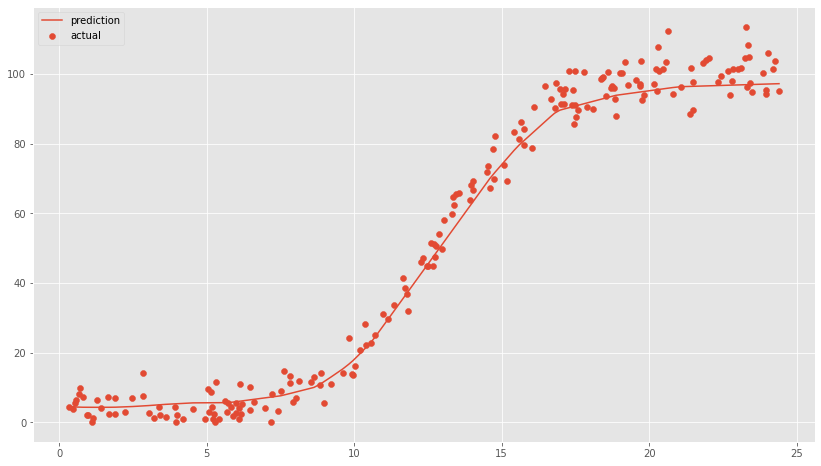

In [42]:
plt.scatter(test['speed'], test['power'], label='actual')
plt.plot(test['speed'], model.predict(test['speed']), label='prediction')
plt.legend()

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.save('my_model.h5')

In [45]:
model.predict([14])

array([[62.99443]], dtype=float32)